# Some Examples with Graphviz

### install it with:
### conda install python-graphviz

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz

dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names = iris.feature_names, 
                                class_names = iris.target_names,
                                filled = True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)


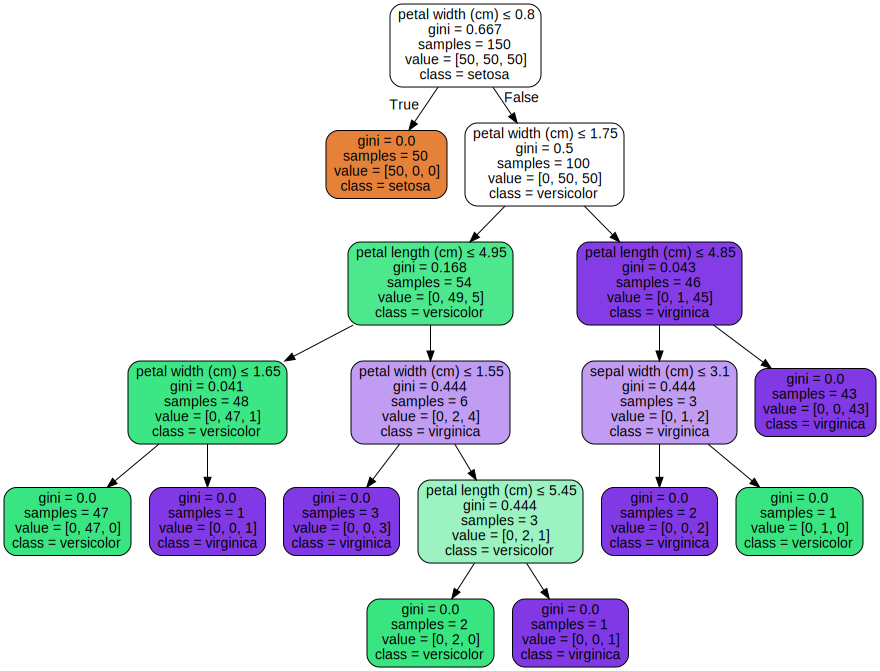

In [3]:
graph


###   conda install pydot

In [3]:
#import graphviz as gv
import numpy as np
import pydot

from graphviz import Source
import pandas as pd
import networkx as nx

df = pd.DataFrame({'Sender': {0: 'A', 1: 'C', 2: 'B', 3: 'D'},
 'Receiver': {0: 'B', 1: 'B', 2: 'D', 3: 'A'},
 'Amount': {0: 88, 1: 71, 2: 32, 3: 26},
 'Sender_Part_Of_Group?': {0: 1, 1: 0, 2: 0, 3: 1},
 'Receiver_Part_Of_Group?': {0: 0, 1: 0, 2: 1, 3: 1}})

G = nx.convert_matrix.from_pandas_edgelist(df,"Sender","Receiver","Amount", create_using = nx.MultiDiGraph())

for i, row in df.iterrows():
    G.nodes[row['Sender']]['style'] = 'filled'
    if row['Sender_Part_Of_Group?']:
        G.nodes[row['Sender']]['color'] = 'red'
    else:
        G.nodes[row['Sender']]['color'] = 'blue'
    if row['Receiver_Part_Of_Group?']:
        G.nodes[row['Receiver']]['color'] = 'red'
    else:
        G.nodes[row['Receiver']]['color'] = 'blue'

dot = nx.nx_pydot.to_pydot(G)

sc = Source(dot, filename = "plot", format = "png", engine = "fdp")
sc.render()

'plot.png'

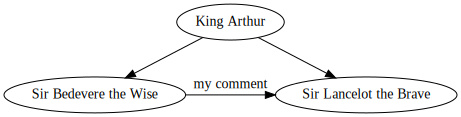

In [6]:
dot = graphviz.Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false', label='my comment')

dot

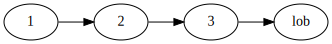

In [7]:
src = graphviz.Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
src

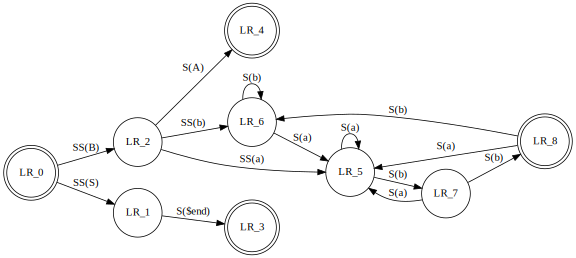

In [8]:
# http://www.graphviz.org/content/fsm

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

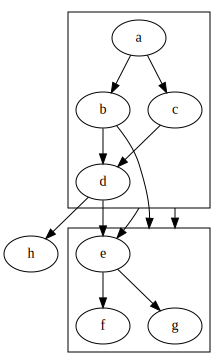

In [9]:
# http://www.graphviz.org/pdf/dotguide.pdf, Figure 20

g = graphviz.Digraph('G', filename='cluster_edge.gv')

g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g